# Exploratory Data Analysis on Netflix Movies & TV Shows
### CodeAlpha Data Analytics Internship

**Intern Name:** Your Name  
**Domain:** Data Analytics  
**Task:** Exploratory Data Analysis (EDA)

## Project Overview

This project performs Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset.

The goal is to:
- Analyze content distribution
- Identify trends over time
- Find most common genres
- Examine ratings distribution
- Study movie duration patterns

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Imported Successfully")

Libraries Imported Successfully


In [5]:
#Load Dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
#Dataset Information
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


:## Observation:
- Dataset contains 8807 rows and 12 columns.
- Some columns have missing values like director, cast, and country.

In [16]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df = df.dropna(subset=['date_added'])
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')

## Data Cleaning Completed
All missing values have been handled appropriately.

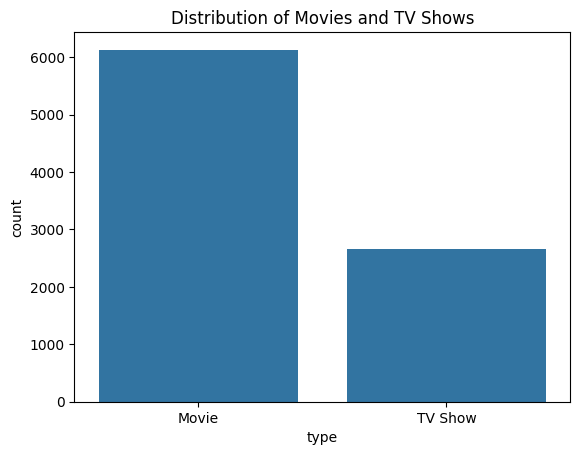

In [18]:
#Movies vs TV Shows Analysis
plt.figure()
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies and TV Shows')
plt.show()

Movies are more numerous than TV Shows on Netflix.

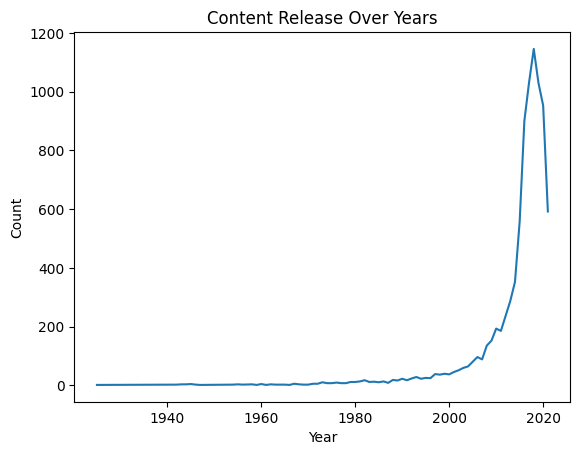

In [19]:
#Content production increased significantly after 2015.
plt.figure()
df['release_year'].value_counts().sort_index().plot()
plt.title('Content Release Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Content production increased significantly after 2015.

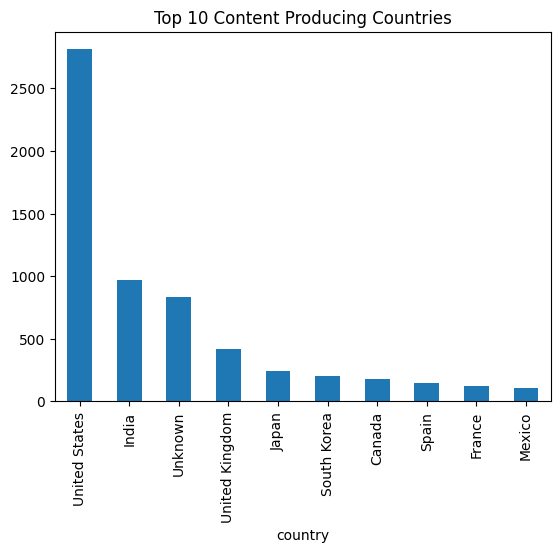

In [20]:
#Top Countries
top_countries = df['country'].value_counts().head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title('Top 10 Content Producing Countries')
plt.show()

United States is the highest content-producing country.

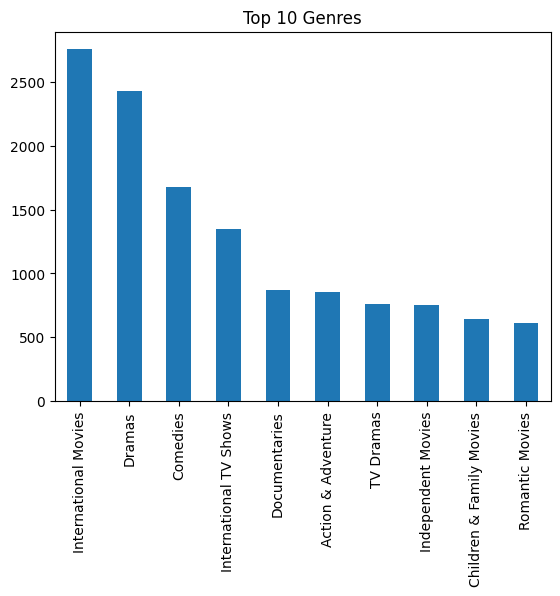

In [21]:
#Genre Analysis
genres = df['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

plt.figure()
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()


Drama is the most dominant genre on Netflix.

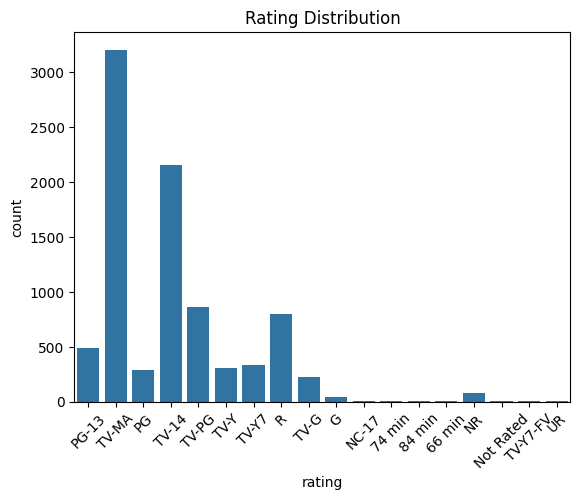

In [22]:
#Rating Analysis
plt.figure()
sns.countplot(x='rating', data=df)
plt.xticks(rotation=45)
plt.title('Rating Distribution')
plt.show()

#TV-MA is the most frequent rating category.

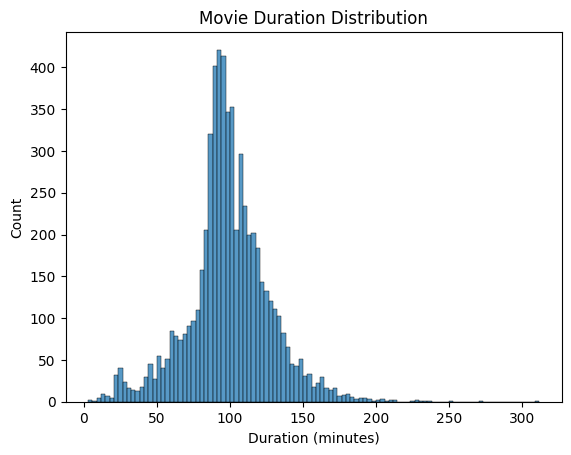

In [23]:
#Movie Duration Analysis
movies = df[df['type'] == 'Movie'].copy()
movies = movies[movies['duration'] != 'Unknown']

movies['duration'] = movies['duration'].str.replace(' min','', regex=False)
movies['duration'] = movies['duration'].astype(float)

plt.figure()
sns.histplot(movies['duration'])
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

#Most movies have duration between 80–120 minutes.

## Final Key Insights

1. Netflix has more Movies than TV Shows.
2. United States produces the highest content.
3. Drama is the most common genre.
4. TV-MA is the dominant rating category.
5. Most movies are between 80–120 minutes.
6. Content growth accelerated after 2015.